In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [97]:
train = pd.read_csv("train_movie_budget.csv")
test = pd.read_csv("test_movie_budget.csv")

In [98]:
print(train.shape)
print(test.shape)

(3000, 23)
(4398, 22)


In [99]:
print(train.head)

<bound method NDFrame.head of         id                              belongs_to_collection    budget  \
0        1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1        2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2        3                                                NaN   3300000   
3        4                                                NaN   1200000   
4        5                                                NaN         0   
...    ...                                                ...       ...   
2995  2996                                                NaN         0   
2996  2997                                                NaN         0   
2997  2998                                                NaN  65000000   
2998  2999                                                NaN  42000000   
2999  3000                                                NaN  35000000   

                                                 genres  \
0         

In [100]:
print(test.head)

<bound method NDFrame.head of         id                              belongs_to_collection    budget  \
0     3001  [{'id': 34055, 'name': 'Pokémon Collection', '...         0   
1     3002                                                NaN     88000   
2     3003                                                NaN         0   
3     3004                                                NaN   6800000   
4     3005                                                NaN   2000000   
...    ...                                                ...       ...   
4393  7394                                                NaN  42000000   
4394  7395  [{'id': 146534, 'name': 'Without a Paddle Coll...  19000000   
4395  7396                                                NaN  16000000   
4396  7397                                                NaN   2000000   
4397  7398                                                NaN     64000   

                                                 genres  \
0     [{'i

In [101]:
train.nunique()

id                       3000
belongs_to_collection     422
budget                    406
genres                    872
homepage                  941
imdb_id                  3000
original_language          36
original_title           2975
overview                 2992
popularity               2999
poster_path              2999
production_companies     2383
production_countries      321
release_date             2398
runtime                   139
spoken_languages          401
status                      2
tagline                  2400
title                    2969
Keywords                 2648
cast                     2975
crew                     2984
revenue                  2850
dtype: int64

In [102]:
train['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

<Axes: xlabel='BUDGET', ylabel='REVENUE'>

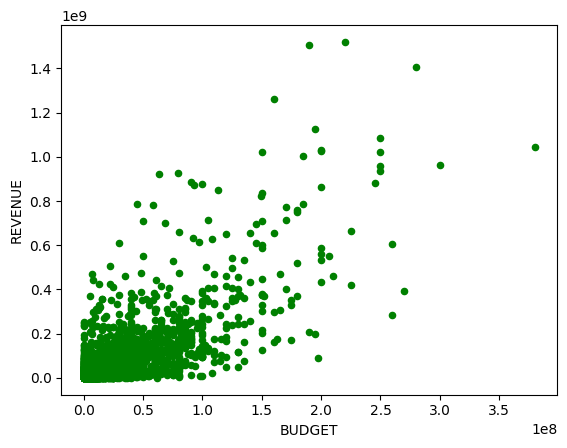

In [103]:
train.plot.scatter('budget','revenue',color='green',xlabel='BUDGET', ylabel='REVENUE')

In [104]:
budget=train.sort_values(by='budget',ascending=False)
revenue=train.sort_values(by='revenue',ascending=False)
print("TOP 10 MOVIES WITH HIGHEST REVENUE BY ID : \n")
print((revenue.loc[:,"revenue"]).head(10))



TOP 10 MOVIES WITH HIGHEST REVENUE BY ID : 

1126    1519557910
1761    1506249360
2770    1405403694
684     1262886337
2322    1123746996
906     1084939099
2135    1045713802
2562    1028570889
881     1025491110
734     1023784195
Name: revenue, dtype: int64


In [105]:
genres = []
repeated_revenues = []
for i in range(len(train)):
  if train['genres'][i] == train['genres'][i]:
      movie_genre = [genre['name'] for genre in eval(train['genres'][i])]
      genres.extend(movie_genre)
      repeated_revenues.extend([train['revenue'][i]]*len(movie_genre))
  
genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

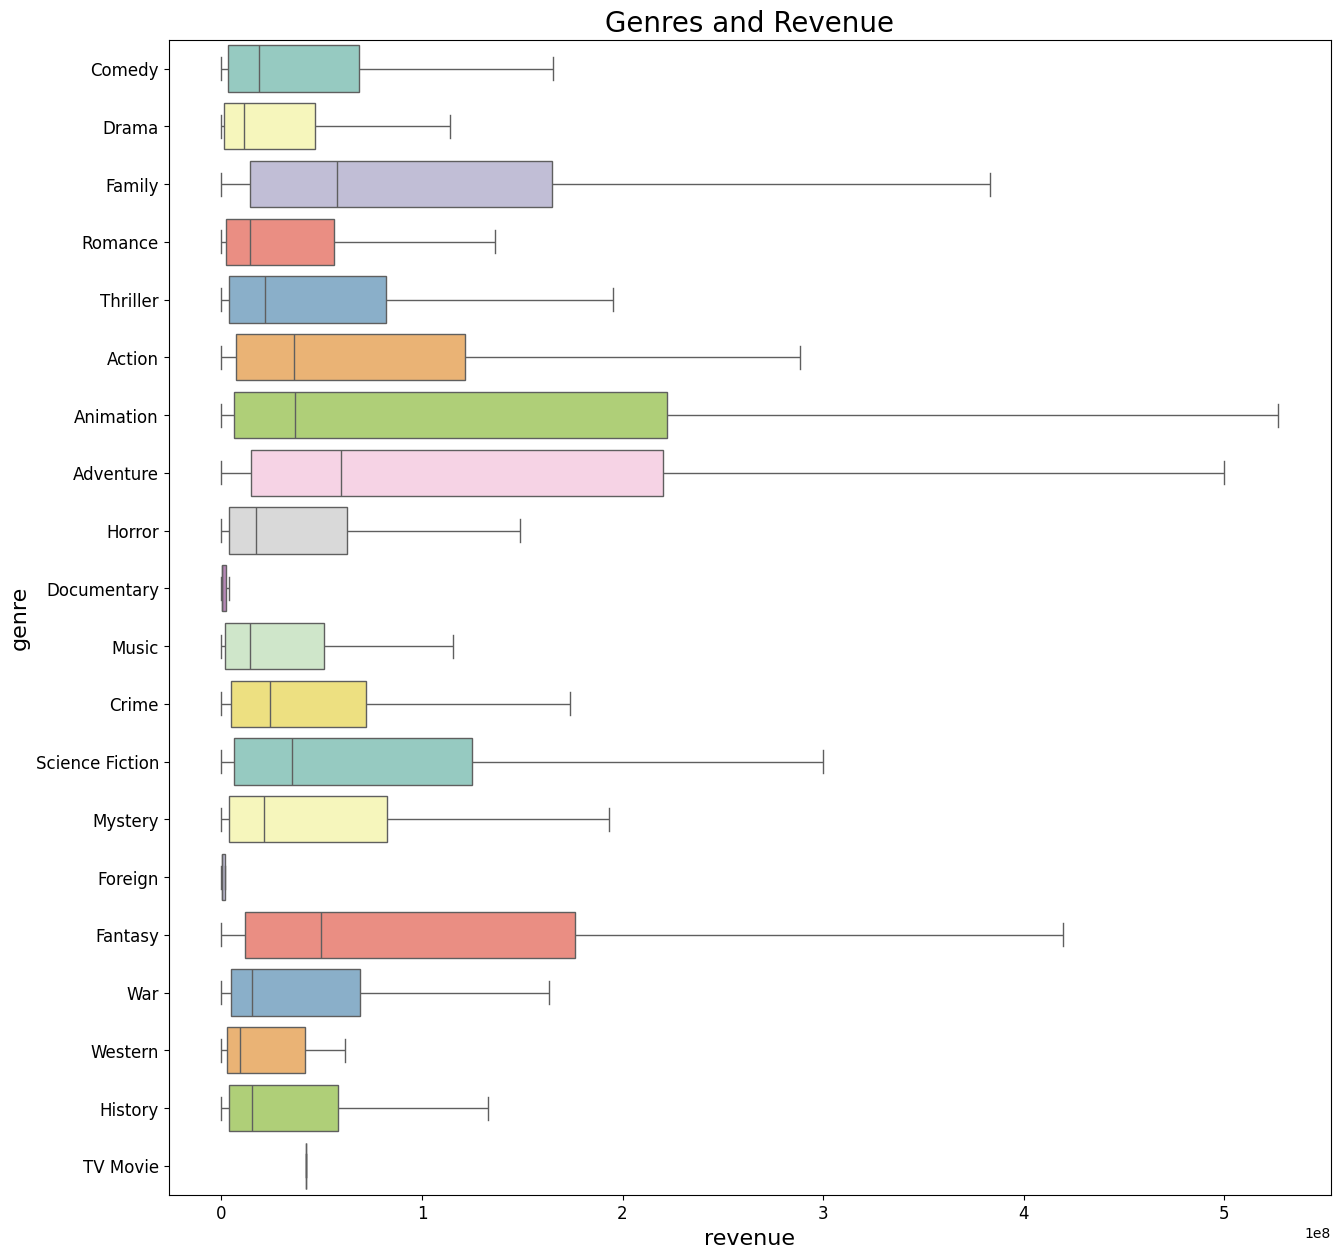

In [106]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
palette = sns.color_palette("Set3", len(set(genres)))
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h' , palette=palette)
plt.show()

In [107]:
genres_count=[]
for i in train['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
train['num_genres'] = genres_count

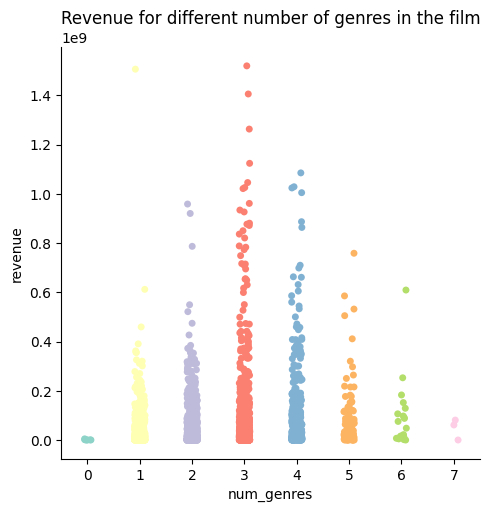

In [108]:
sns.catplot(x='num_genres', y='revenue', data=train , palette=palette);
plt.title('Revenue for different number of genres in the film');

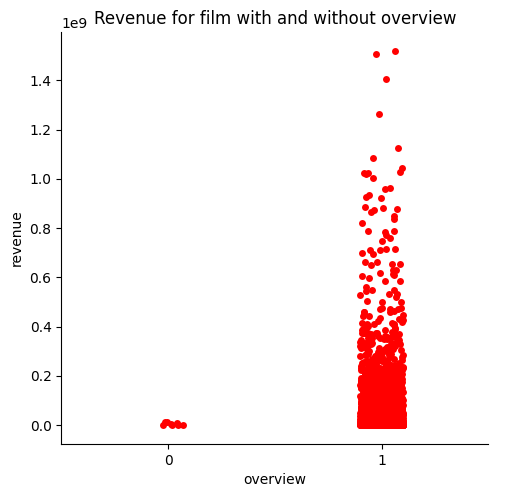

In [109]:
train['overview']=train['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['overview']=test['overview'].apply(lambda x: 0 if pd.isnull(x) else 1)
sns.catplot(x='overview', y='revenue', data=train, color="red");
plt.title('Revenue for film with and without overview');

<Axes: >

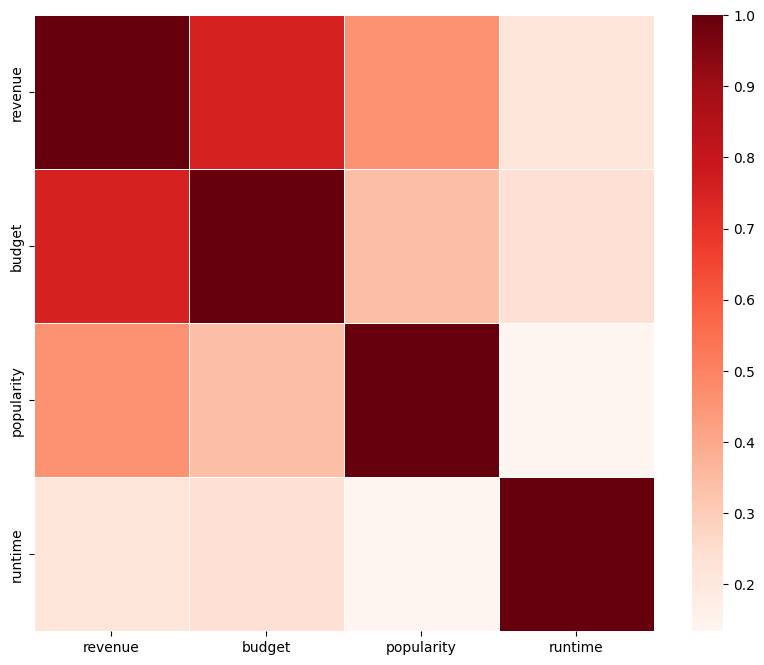

In [110]:
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = train[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

<Axes: xlabel='budget', ylabel='revenue'>

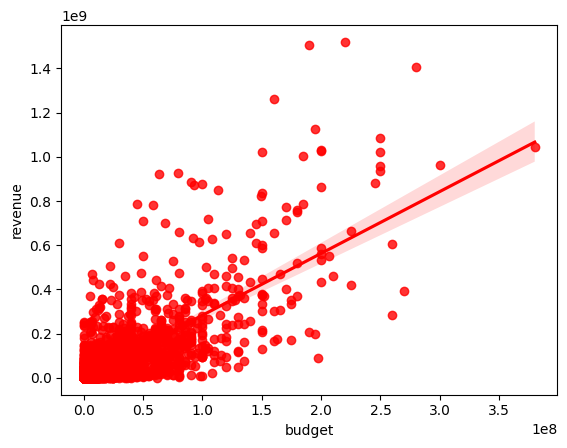

In [111]:
sns.regplot(x="budget", y="revenue", data = train, color="red")

In [112]:
print("train data")
print(train['status'].value_counts())
print("test data")
test['status'].value_counts()

train data
status
Released    2996
Rumored        4
Name: count, dtype: int64
test data


status
Released           4389
Post Production       5
Rumored               2
Name: count, dtype: int64

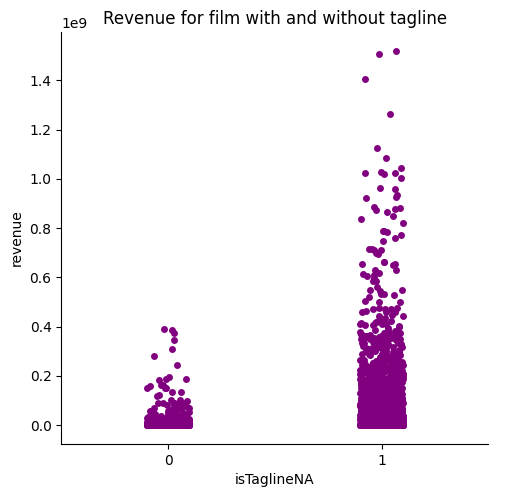

In [113]:
train['isTaglineNA'] = 0
train.loc[train['tagline'].isnull() == False, 'isTaglineNA'] = 1
test['isTaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'isTaglineNA'] = 1

#Homepage v/s Revenue
sns.catplot(x='isTaglineNA', y='revenue', data = train, color="purple");
plt.title('Revenue for film with and without tagline');

In [114]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,num_genres,isTaglineNA
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,1,6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,1,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,4,1
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,1,64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,1,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1,1.148070,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,0


In [115]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,isTaglineNA
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,1,3.851534,...,7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",1
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,1,3.559789,...,5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",1
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,1,8.085194,...,5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",1
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,1,8.596012,...,9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",1
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,1,3.217680,...,2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",1


In [116]:
print(train.shape,test.shape)

(3000, 25) (4398, 23)


In [136]:
train_new = train.drop(columns=["homepage","belongs_to_collection","original_language","imdb_id" ,"production_countries", "production_companies", "status", "cast", "crew", "genres", "release_date", "original_title", "spoken_languages", "title","poster_path","tagline","Keywords"], axis=1)
test_new = test.drop(columns=["homepage","belongs_to_collection", "original_language", "imdb_id","production_countries", "production_companies", "status", "cast", "crew", "genres", "release_date", "original_title", "spoken_languages", "title","poster_path","tagline","Keywords"], axis=1)

In [137]:
train_new['budget'] = np.log1p(train_new['budget'])
test_new['budget'] = np.log1p(test_new['budget'])

In [145]:
train_new.head

<bound method NDFrame.head of         id     budget  overview  popularity  runtime    revenue  num_genres  \
0        1  16.454568         1    6.575393     93.0   12314651           1   
1        2  17.504390         1    8.248895    113.0   95149435           4   
2        3  15.009433         1   64.299990    105.0   13092000           1   
3        4  13.997833         1    3.174936    122.0   16000000           2   
4        5   0.000000         1    1.148070    118.0    3923970           2   
...    ...        ...       ...         ...      ...        ...         ...   
2995  2996   0.000000         1    9.853270    102.0    1596687           2   
2996  2997   0.000000         1    3.727996    102.0     180590           2   
2997  2998  17.989898         1   14.482345    120.0   89456761           4   
2998  2999  17.553180         1   15.725542     90.0  171963386           2   
2999  3000  17.370859         1   10.512109    106.0   82087155           3   

      isTaglineNA  
0

In [146]:
test_new.head

<bound method NDFrame.head of         id     budget  overview  popularity  runtime  isTaglineNA
0     3001   0.000000         1    3.851534     90.0            1
1     3002  11.385103         1    3.559789     65.0            1
2     3003   0.000000         1    8.085194    100.0            1
3     3004  15.732433         1    8.596012    130.0            1
4     3005  14.508658         1    3.217680     92.0            1
...    ...        ...       ...         ...      ...          ...
4393  7394  17.553180         1    9.970359    118.0            1
4394  7395  16.759950         1    6.046516     95.0            1
4395  7396  16.588099         1    9.596883    129.0            1
4396  7397  14.508658         1   20.359336    100.0            1
4397  7398  11.066654         1   11.305910     85.0            1

[4398 rows x 6 columns]>

In [147]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(train_new[cols])

y = np.log1p(train_new['revenue'].values)
clf = LinearRegression()
scores = cross_val_score(clf, X_imputed, y, scoring="neg_mean_squared_error", cv=8)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

2.5262390288836647
